<img style="float:right" width="400" src="http://static1.squarespace.com/static/5a4e740c4c326d723144bf21/t/5a4ebe39ec212d389156642c/1515109949850/Group%402x.png?format=1500w">

# 2. IGN Ratings Project
For this project you've recently decided to create your very own video game! As an avid reader of IGN Game Reviews, you hear about all of the most recent game releases, along with the ranking they've received from experts, ranging from 0 (Disaster) to 10 (Masterpiece).

## Getting started

When doing data analysis we will often have a question in mind that we want to answer.  In this case, we want to know what gaming platform is the best for your preferred game genre.

To get started, create a new notebook, and add a markup block to the top to give the note book a title, some background, the questions you have and perhaps an image to illustrate the problem or the domain.


# Accessing Data

Before we can do anything, we need data for analysis and make it accessible by our notebook.

For the projects we're working on in this course, we've made the data sets available in a github repository.  You can either download them from there and upload them to your notebook environment, or clone the repository in your environment.

** ensure datasets are in a directory accessible by the notebook, either by uploading to Google Drive, or by cloning the dataset in the repository using: **

```
!git clone https://github.com/mblackstock/datasets.git
```

** instructions to download complete dataset and upload to a location for students notebooks on colab. **

The datasets are now available in the directory `datasets`.

In [1]:
# Do this once if the dataset is not available yet
# !git clone https://github.com/mblackstock/datasets.git

# Set up

To make it easier to write code, we'll import and configure the libraries we want to use at the top of our notebook.

In [2]:
%matplotlib inline
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


Lets look at this code block more carefully.

`%matplotlib inline` chooses the plotting 'engine' or 'backend' for drawing plots in Jupyter notebooks.  This may not be set to the default in some python environments so we set it here.  The `%` indicates it is a 'magic function' that is called by the Jupyter notebook environment.

Next, we'll import the **pandas** library into our notebook so we can use them in our code.  Pandas is the key library we use for file input and output and data processing.  Much of this course will be about becoming familiar with using Python with Pandas.

The second is a line recommended to avoid [a warning](https://stackoverflow.com/questions/61443261/what-is-the-use-of-pd-plotting-register-matplotlib-converters-in-pandas)

We then import the matplot visualization library and reference it as plt, and the seaborn library as sns.

## Ensuring data is accessible

Let's use a terminal command to make sure our data is accessible by Python and our notebook.

In [3]:
!head -n 5 datasets/ign/ign_scores.csv

Platform,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Dreamcast,6.8828571428571435,7.51111111111111,6.281818181818181,8.2,8.34,8.088888888888889,7.7,7.0424999999999995,7.616666666666668,7.628571428571428,7.272222222222222,6.433333333333333
Game Boy Advance,6.373076923076922,7.507692307692309,6.057142857142857,6.226315789473684,6.970588235294118,6.5321428571428575,7.542857142857143,6.6571428571428575,6.444444444444445,6.928571428571429,6.694444444444444,7.175000000000001
Game Boy Color,6.2727272727272725,8.166666666666666,5.3076923076923075,4.5,6.352941176470588,6.583333333333333,7.285714285714286,5.897435897435898,4.5,5.9,5.790697674418604,7.4
GameCube,6.5325842696629195,7.608333333333334,6.753846153846154,7.422222222222222,6.665714285714286,6.133333333333333,7.890909090909091,6.85263157894737,6.981818181818183,8.028571428571428,7.4813186813186805,7.116666666666667


## Terminal commands in Jupyter

We can terminal commands from Jupyter notebooks by prepending an exclamation point or bang (!).  Here I ran the `head` command to see the beginning of the csv file to make sure it is where I want it.

This is a quick way of viewing the 'raw' data before we try to load it using python.

In addition to using terminal commands, we can use *magic commands* supported by the underlying IPython environment by prepending percent (%).  For example, to see the current working directory:

In [4]:
%pwd

'/Users/mike/dev/notebooks'

You can also use `%run` to run python code in the notebook, or `%load` to load python code into the notebook, providing a path or a URL. To get a list of commands:

In [5]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

# Loading Data

Now that we know we can access the data, lets load it into our Python environment so we can work with it.

In [6]:
# Path of the file to read
ign_filepath = "datasets/ign/ign_scores.csv"

# Fill in the line below to read the file into a variable ign_data
ign_data = pd.read_csv(ign_filepath, index_col="Platform")
print("Data loaded")

Data loaded


Here we're setting a variable to the string that is the path to our data set which is a CSV file.  Notice that unlike Java, we don't have to declare the type of variables in Python.  Notice also that comments use the `#` character.

We use the pandas `read_csv` method to read in csv files, a very common data format.  One of the named arguments for this method allows us to set the *index* of the pandas datastructure called a DataFrame to the *Platform* colum.n. More on DataFrames and indexes later.

Lets have a look at the data we've loaded.

In [7]:
ign_data

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000
Nintendo 64,6.649057,8.250000,7.000000,5.681250,6.889655,7.461538,6.050000,6.939623,8.042857,5.675000,6.967857,6.900000
Nintendo DS,5.903608,7.240000,6.259804,6.320000,6.840000,6.604615,7.222619,6.038636,6.965217,5.874359,5.936667,6.644737
Nintendo DSi,6.827027,8.500000,6.090909,7.500000,7.250000,6.810526,7.166667,6.563636,6.500000,5.195652,5.644444,6.566667
PC,6.805791,7.334746,7.136798,7.166667,7.410938,6.924706,7.759930,7.032418,7.084878,7.104889,6.902424,7.310207


We can see this data contains the average rating of different game genres for each platform. Cool!  Just what we need.



# Pandas Data Structures

This data has been loaded into a data structure called a `DataFrame` which is one of the main data structures supported by Pandas.  The other important data structure is called a `Series`.

## Pandas Series

A pandas Series is a one dimensional array-like object that has a sequence of values.  It has an index which is assigned automatically to range as shown.

In [8]:
example = pd.Series([4,-7,5,3])
example

0    4
1   -7
2    5
3    3
dtype: int64

In [9]:
# We can assign a different index to this series

example.index = ['a','b','c','d']
print(example)
print(example.a)

a    4
b   -7
c    5
d    3
dtype: int64
4


## DataFrame

A Dataframe is a table of data with a collection of columns that can be different types.  In our IGN data, all of the columns contain float numbers.

It has a row and a column index.  In our case the row index is the name of the different platforms, and the column index is the list of the different genres.  The index can be strings, times, numbers, or other types.  A `DataFrame` can be thought of as a collection of `Series` where all of the `Series` share the `DataFrame`s index.

Let's print the Action genre column and the average rating of an Action game for the GameCube.

In [10]:
action_ratings = ign_data['Action']
print(ign_data['Action'])
print("GameCube action rating average :",action_ratings['GameCube'])

Platform
Dreamcast               6.882857
Game Boy Advance        6.373077
Game Boy Color          6.272727
GameCube                6.532584
Nintendo 3DS            6.670833
Nintendo 64             6.649057
Nintendo DS             5.903608
Nintendo DSi            6.827027
PC                      6.805791
PlayStation             6.016406
PlayStation 2           6.467361
PlayStation 3           6.853819
PlayStation 4           7.550000
PlayStation Portable    6.467797
PlayStation Vita        7.173077
Wii                     6.262718
Wireless                7.041699
Xbox                    6.819512
Xbox 360                6.719048
Xbox One                7.702857
iPhone                  6.865445
Name: Action, dtype: float64
GameCube action rating average : 6.53258426966292


# Understanding data

Once we've loaded data, the first thing we want to do is to get to know the data better.  We can use Pandas to get some basic info about DataFrames.

In [11]:
ign_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Dreamcast to iPhone
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Action             21 non-null     float64
 1   Action, Adventure  21 non-null     float64
 2   Adventure          21 non-null     float64
 3   Fighting           21 non-null     float64
 4   Platformer         21 non-null     float64
 5   Puzzle             21 non-null     float64
 6   RPG                21 non-null     float64
 7   Racing             21 non-null     float64
 8   Shooter            21 non-null     float64
 9   Simulation         21 non-null     float64
 10  Sports             21 non-null     float64
 11  Strategy           21 non-null     float64
dtypes: float64(12)
memory usage: 2.7+ KB


This gives us the 'shape' of our data (21 rows, 12 columns) and the types of each column.

We can also get some basic statistics about the data using the `describe()` method.

In [12]:
ign_data.describe()

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,6.707490,7.505402,6.762933,6.864066,7.304406,7.044883,7.539589,6.760007,7.010270,6.983722,6.909593,7.215837
std,0.442479,0.495720,0.641049,0.812402,0.592512,0.773113,0.520318,0.636959,0.759933,0.951588,0.626141,0.638597
min,5.903608,6.133333,5.307692,4.500000,6.352941,5.125000,6.050000,5.011667,4.500000,5.195652,5.644444,6.433333
25%,6.467361,7.294643,6.281818,6.553731,6.889655,6.583333,7.285714,6.563636,6.641667,6.327027,6.694444,6.644737
50%,6.719048,7.481818,6.821429,7.029630,7.250000,6.924706,7.542857,6.898305,7.033333,7.142857,7.130000,7.175000
75%,6.865445,7.764286,7.136798,7.422222,7.509091,7.461538,7.890909,7.021591,7.485417,7.628571,7.331818,7.400000
max,7.702857,8.500000,8.057143,8.200000,8.568750,8.250000,8.291667,8.163636,8.042857,9.250000,7.884397,8.900000


Describe gives us some basic statistics about each of the columns of our data.

## Accessing data in DataFrames

We can use Python and Pandas to access parts of the data.  We can view only 2 columns if we want:

In [13]:
# action and adventure only
ign_data[['Action', 'Adventure']]

,Action,Adventure
Platform,,
Dreamcast,6.882857,6.281818
Game Boy Advance,6.373077,6.057143
Game Boy Color,6.272727,5.307692
GameCube,6.532584,6.753846
Nintendo 3DS,6.670833,7.414286
Nintendo 64,6.649057,7.000000
Nintendo DS,5.903608,6.259804
Nintendo DSi,6.827027,6.090909
PC,6.805791,7.136798


Say we want to get the first two rows.  We can use the Python slice syntax:

In [14]:
# first two rows
ign_data[:2]

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000


Or get a single row as a series

In [15]:
# Game Boy Advance averages only
ign_data.loc['Game Boy Advance']

Action               6.373077
Action, Adventure    7.507692
Adventure            6.057143
Fighting             6.226316
Platformer           6.970588
Puzzle               6.532143
RPG                  7.542857
Racing               6.657143
Shooter              6.444444
Simulation           6.928571
Sports               6.694444
Strategy             7.175000
Name: Game Boy Advance, dtype: float64

We can also get rows based on a certain condition.  For example, say we want all of the rows where the Platformer rating is greater than 8.0.

In [16]:
# platforms where the platformer rating is greater than 8.0
ign_data[ign_data.Platformer > 8.0]

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.7000,7.0425,7.616667,7.628571,7.272222,6.433333
PlayStation 4,7.550000,7.835294,7.388571,7.280000,8.390909,7.400000,7.9440,7.5900,7.804444,9.250000,7.430000,6.566667
PlayStation Vita,7.173077,6.133333,8.057143,7.527273,8.568750,8.250000,7.3375,6.3000,7.660000,5.725000,7.130000,8.900000


## Which platform is best?

Since you can remember, your favorite video game has been Mario Kart Wii, a racing game released for the Wii platform in 2008. And, IGN agrees with you that it is a great game -- their rating for this game is a whopping 8.9! Inspired by the success of this game, you're considering creating your very own racing game for the Wii platform.

# Visualizing Data

Lets create a bar chart that shows the average score for racing games, for each platform, one bar for each platform.

## Simple chart using MatPlotLib

We can create a simple barchart using matplot which is integrated into pandas as follows.

<AxesSubplot:ylabel='Platform'>

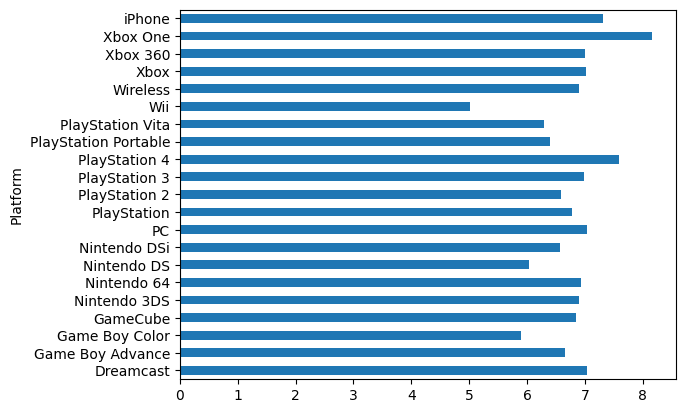

In [17]:
ign_data['Racing'].plot.barh()

Text(0.5, 1.0, 'Average Racing game ratings by platform')

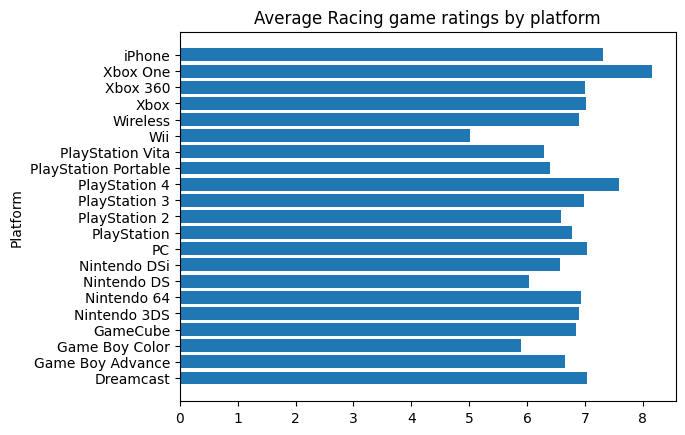

In [18]:
# another way to write this
plt.barh(ign_data.index, ign_data["Racing"])
plt.ylabel("Platform")
plt.title("Average Racing game ratings by platform")

The documentation for matplotlib is at https://matplotlib.org/stable/index.html

## Seaborn visualizations

We can also use the **seaborn** library which extends matplotlib to create a fancier looking barchart.  Seaborn includes more visualizations, has some built in statistics and look nicer out of the box.

Text(0.5, 1.0, 'Average Score for Racing Games, by Platform')

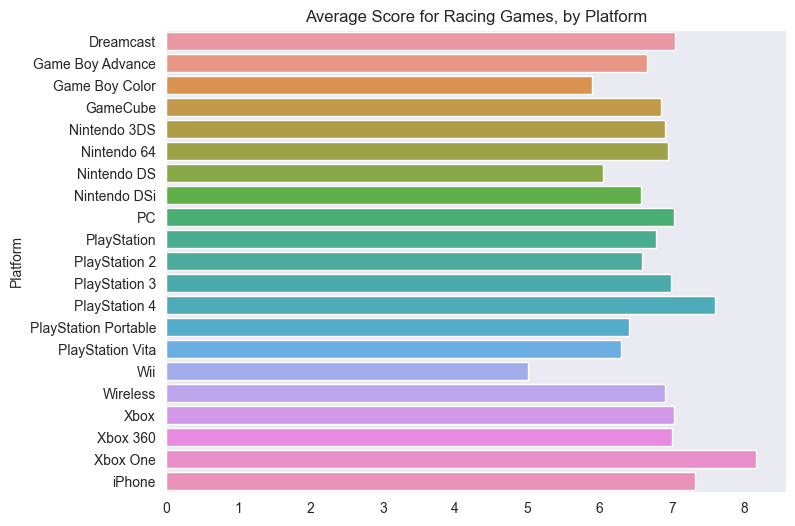

In [19]:
# Set the width and height of the figure in inches (8 wide, 6 high)
plt.figure(figsize=(8, 6))
# nice gray background
sns.set_style("dark")
# Bar chart showing average score for racing games by platform
sns.barplot(x=ign_data["Racing"], y=ign_data.index)
# remove the x label since we already know this is Racing
plt.xlabel("")
# Add label for vertical axis
plt.title("Average Score for Racing Games, by Platform")

Documentation can be found here:

https://seaborn.pydata.org/index.html

Would you expect a racing game on the Wii platform to do well?  If not, which platform is the best bet for racing games?

# Visualizing all possible combinations!

Eventually, you decide against creating a racing game for Wii, but you're still committed to creating your own video game! Since your gaming interests are pretty broad (... you generally love most video games), you decide to use the IGN data to inform your new choice of genre and platform.

Let's use the data to create a *heatmap* of the average ratings by genre and platform.

Text(0.5, 1.0, 'Average Game Score, by Platform and Genre')

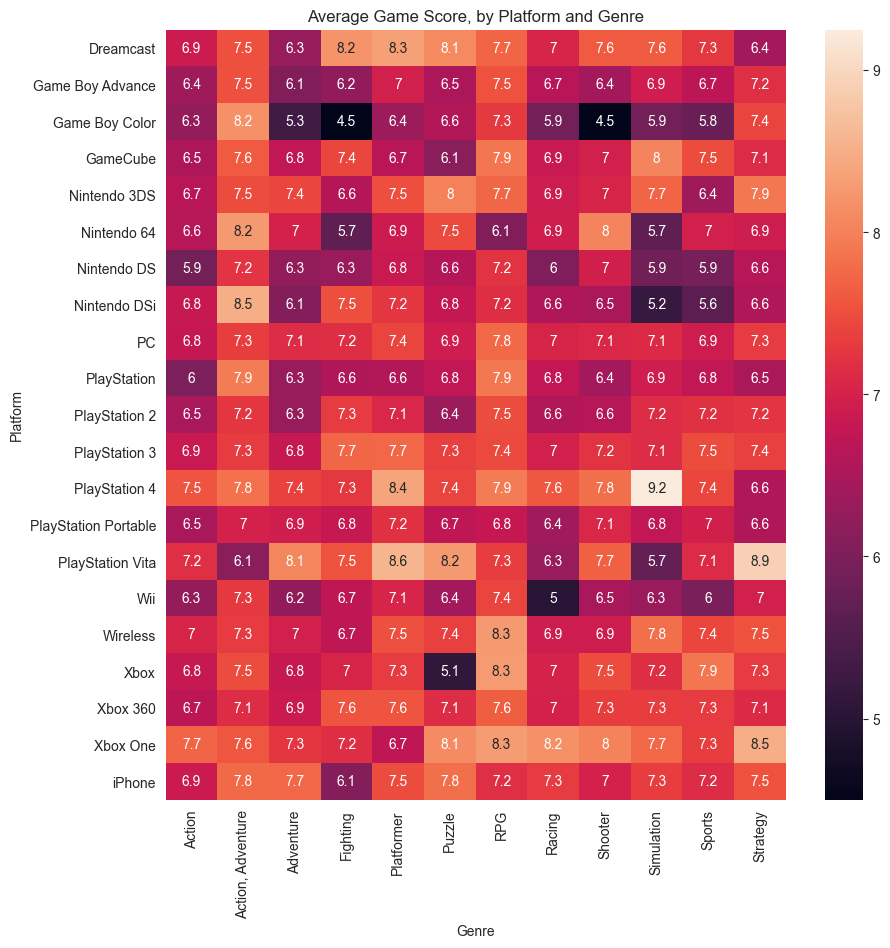

In [20]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))
# Heatmap showing average game score by platform and genre
sns.heatmap(ign_data, annot=True)
# Add label for horizontal axis
plt.xlabel("Genre")
# Add label for vertical axis
plt.title("Average Game Score, by Platform and Genre")

Cool!  This makes it much easier to see the data.  Which combination of genre and platform receives the highest average ratings? Which combination receives the lowest average rankings?

# Data Aggregation

Lets use some simple aggregation functions to understand the different platforms and genres a bit better.

First, lets see what genres have the best ratings overall.

In [21]:
ign_data.mean().sort_values(ascending=False)

RPG                  7.539589
Action, Adventure    7.505402
Platformer           7.304406
Strategy             7.215837
Puzzle               7.044883
Shooter              7.010270
Simulation           6.983722
Sports               6.909593
Fighting             6.864066
Adventure            6.762933
Racing               6.760007
Action               6.707490
dtype: float64

Notice how we easily calculated the average for each column?  We then took this series and sorted it by value in decending order.

Looks like people rate RPG games higher more consistently.

Next lets look at the average rating by platform

In [22]:
ign_data.mean(axis=1).sort_values()

Platform
Game Boy Color          6.163101
Nintendo DS             6.487522
Wii                     6.514726
Nintendo DSi            6.717961
Game Boy Advance        6.759118
PlayStation             6.785652
PlayStation Portable    6.809053
Nintendo 64             6.875570
PlayStation 2           6.920915
GameCube                7.122329
Xbox                    7.143010
PC                      7.164533
Xbox 360                7.225540
iPhone                  7.271501
Nintendo 3DS            7.277177
PlayStation 3           7.282974
Wireless                7.313729
PlayStation Vita        7.396840
Dreamcast               7.416497
PlayStation 4           7.702490
Xbox One                7.714107
dtype: float64

Here we set the axis to 1 meaning do the calculation across the rows instead of the columns.

Lets add the mean and standard devation to the original `DataFrame` and sort the `DataFrame` by average (mean). With the barplot we can also add error bars to show the standard deviation. Standard deviation is a measure of the amount of deviation of a data set from the mean.

In [23]:
ign_data['mean'] = ign_data.mean(axis=1)
ign_data = ign_data.sort_values("mean")
ign_data['std'] = ign_data.std(axis=1)
ign_data[['mean','std']]

,mean,std
Platform,,
Game Boy Color,6.163101,1.063451
Nintendo DS,6.487522,0.482980
Wii,6.514726,0.626290
Nintendo DSi,6.717961,0.829125
Game Boy Advance,6.759118,0.457511
PlayStation,6.785652,0.557233
PlayStation Portable,6.809053,0.232902
Nintendo 64,6.875570,0.775914
PlayStation 2,6.920915,0.397826


<AxesSubplot:xlabel='mean', ylabel='Platform'>

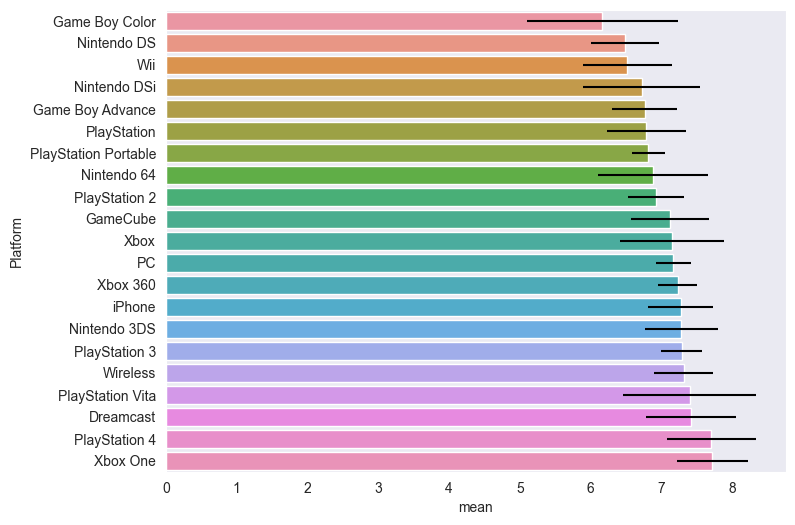

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(data=ign_data, y=ign_data.index, x="mean", xerr=ign_data["std"])

Overall, the X-Box One has the highest rated games.  The standard deviation for the PSP is the lowest across genres.

# What Next?

It is possible to get the individual ratings of video games [here](https://www.kaggle.com/adakibet/igns-game-reviews) and [here](https://www.dropbox.com/s/09sh15zbtwg9eu3/gamedata.xlsx)

What other questions are you interested in about video games?  What can you answer with this data or additional data available?

